<a href="https://colab.research.google.com/github/sjsjlee/study_financial_data_analysis/blob/main/Volatility_Targeting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 레벨 : 중급
2. 스타일 : 자산배분
3. 기대 CAGR : 변동성에 따라 다름
4. 매수전략 
- 특정 주가 지수, 주식 또는 포트폴리오를 선택
- 주가지수, 주식 또는 포트폴리오의 변동성을 계산
- 투자 비중을 목표 변동성에 맞춤
- 평균 모멘텀 스코어를 통해 다시 한번 투자 비중을 조정
- 나머지 금액은 현금 보유
5. 매도전략 : 월 1회 리밸런싱

##Load Libraries & Dataset

In [1]:
import pandas as pd
import requests
from tqdm import tqdm

###KODEX 200

In [29]:
kodex_200 = pd.DataFrame()
kodex_url = 'https://finance.naver.com/item/sise_day.nhn?code=069500'

for page in tqdm(range(1, 100)) :
  pg_url = '{url}&page={page}'.format(url=kodex_url, page=page)
  pg_url = requests.get(pg_url, headers = {'User-agent' : 'Mozilla/5.0'}).text
  kodex_200 = kodex_200.append(pd.read_html(pg_url)[0], ignore_index = True)

kodex_200 = kodex_200.dropna()
kodex_200.columns = ['date', 'close',' over_the_day', 'open', 'high', 'low', 'volume']
kodex_200.date = pd.to_datetime(kodex_200.date)  

100%|██████████| 99/99 [01:22<00:00,  1.19it/s]


In [30]:
kodex_200 = kodex_200.sort_values(by = 'date')
#인덱스 0부터 재정렬
kodex_200.index = [x for x in range(len(kodex_200))]
kodex_200

,date,close,over_the_day,open,high,low,volume
0,2017-10-26,32750.0,225.0,32985.0,33000.0,32750.0,2933625.0
1,2017-10-27,32975.0,225.0,32770.0,33020.0,32735.0,3605678.0
2,2017-10-30,33045.0,100.0,33130.0,33160.0,33000.0,8076036.0
3,2017-10-31,33375.0,330.0,33050.0,33460.0,33000.0,18472117.0
4,2017-11-01,33925.0,550.0,33665.0,33925.0,33575.0,14991272.0
...,...,...,...,...,...,...,...
985,2021-10-28,39460.0,110.0,39540.0,39735.0,39445.0,3524611.0
986,2021-10-29,38825.0,635.0,39625.0,39635.0,38740.0,5479280.0
987,2021-11-01,38985.0,160.0,39150.0,39175.0,38945.0,4179211.0
988,2021-11-02,39505.0,520.0,39195.0,39815.0,39195.0,3437518.0


#Convert into Monthly Data

In [31]:
kodex_monthly = pd.DataFrame()

for y in range(2017, 2022) :
  for m in range(1,13) :
     
    kodex_monthly = kodex_monthly.append(
        kodex_200 [(kodex_200.date.dt.year == y) & (kodex_200.date.dt.month == m)].head(1)
    )
kodex_monthly.index = [x for x in range(len(kodex_monthly))]
kodex_monthly

,date,close,over_the_day,open,high,low,volume
0,2017-10-26,32750.0,225.0,32985.0,33000.0,32750.0,2933625.0
1,2017-11-01,33925.0,550.0,33665.0,33925.0,33575.0,14991272.0
2,2017-12-01,32525.0,10.0,32630.0,32680.0,32465.0,7732881.0
3,2018-01-02,32925.0,145.0,32910.0,33005.0,32805.0,4611286.0
4,2018-02-01,33715.0,10.0,33845.0,33905.0,33650.0,4575054.0
5,2018-03-02,31245.0,445.0,31395.0,31405.0,31060.0,7347587.0
6,2018-04-02,31885.0,75.0,32025.0,32205.0,31865.0,5388437.0
7,2018-05-02,32070.0,230.0,32185.0,32250.0,32025.0,8195109.0
8,2018-06-01,31290.0,190.0,31120.0,31405.0,30995.0,10163157.0
9,2018-07-02,29375.0,670.0,29995.0,30080.0,29375.0,9553811.0


In [34]:
kodex_200[(kodex_200.date.dt.year == 2017) & (kodex_200.date.dt.month == 10)].head(1)

,date,close,over_the_day,open,high,low,volume
0,2017-10-26,32750.0,225.0,32985.0,33000.0,32750.0,2933625.0


#Calculate Volatility(Standard deviation)

In [35]:
kodex_200

,date,close,over_the_day,open,high,low,volume
0,2017-10-26,32750.0,225.0,32985.0,33000.0,32750.0,2933625.0
1,2017-10-27,32975.0,225.0,32770.0,33020.0,32735.0,3605678.0
2,2017-10-30,33045.0,100.0,33130.0,33160.0,33000.0,8076036.0
3,2017-10-31,33375.0,330.0,33050.0,33460.0,33000.0,18472117.0
4,2017-11-01,33925.0,550.0,33665.0,33925.0,33575.0,14991272.0
...,...,...,...,...,...,...,...
985,2021-10-28,39460.0,110.0,39540.0,39735.0,39445.0,3524611.0
986,2021-10-29,38825.0,635.0,39625.0,39635.0,38740.0,5479280.0
987,2021-11-01,38985.0,160.0,39150.0,39175.0,38945.0,4179211.0
988,2021-11-02,39505.0,520.0,39195.0,39815.0,39195.0,3437518.0


In [36]:
#std 리스트 추가

std_list = []

for y in range(2017, 2022) :
  for m in range(1,13) :
    abs_std = kodex_200[(kodex_200.date.dt.year == y) & (kodex_200.date.dt.month == m)].std().close
    monthly_mean = kodex_200[(kodex_200.date.dt.year ==y) & (kodex_200.date.dt.month == m)].mean().close
    rel_std = abs_std / monthly_mean * 100 #상대표준편차

    if rel_std > 0 :
      std_list.append(rel_std)

len(std_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datet

50

In [37]:
len(kodex_monthly)

50

In [38]:
std_list

[0.7825752758955624,
 0.9998231795711847,
 0.8258359360259442,
 1.0068701201447285,
 2.111156203788605,
 1.701908065123495,
 0.8549477450173836,
 0.8470999858894197,
 2.0929797501861005,
 0.6418663009627067,
 1.163913732667005,
 1.095828721819143,
 4.149629794473744,
 0.9446547903607997,
 1.3041726651126195,
 3.339670595933051,
 0.8101960301274155,
 0.8427714540440128,
 1.063713133215875,
 2.6402400044897902,
 1.3168885147586176,
 1.0841603705459195,
 1.3445853829737189,
 2.2040389711615713,
 1.23234760539685,
 0.981579376710989,
 3.0449962782267836,
 2.1889777066280156,
 3.303759118565927,
 10.15656137623796,
 3.291904966195177,
 2.2585422246248674,
 2.1451748907135397,
 1.8844666779851167,
 2.136191919352249,
 1.7629219189985648,
 1.2815711405438635,
 4.11080108152898,
 2.4700864807728777,
 2.5713693625363288,
 1.2488068945858115,
 0.9666466496827073,
 1.1053608752700592,
 1.039085327630206,
 0.760435466419823,
 0.942299949235054,
 2.5897022063006547,
 1.400280957934946,
 1.268873198

In [39]:
kodex_monthly['std'] = std_list
kodex_monthly

,date,close,over_the_day,open,high,low,volume,std
0,2017-10-26,32750.0,225.0,32985.0,33000.0,32750.0,2933625.0,0.782575
1,2017-11-01,33925.0,550.0,33665.0,33925.0,33575.0,14991272.0,0.999823
2,2017-12-01,32525.0,10.0,32630.0,32680.0,32465.0,7732881.0,0.825836
3,2018-01-02,32925.0,145.0,32910.0,33005.0,32805.0,4611286.0,1.006870
4,2018-02-01,33715.0,10.0,33845.0,33905.0,33650.0,4575054.0,2.111156
5,2018-03-02,31245.0,445.0,31395.0,31405.0,31060.0,7347587.0,1.701908
6,2018-04-02,31885.0,75.0,32025.0,32205.0,31865.0,5388437.0,0.854948
7,2018-05-02,32070.0,230.0,32185.0,32250.0,32025.0,8195109.0,0.847100
8,2018-06-01,31290.0,190.0,31120.0,31405.0,30995.0,10163157.0,2.092980
9,2018-07-02,29375.0,670.0,29995.0,30080.0,29375.0,9553811.0,0.641866


##Calculate RoR

In [40]:
#종가가 이전달 대비 얼마만큼 하락?

kodex_monthly.close.diff()

0        NaN
1     1175.0
2    -1400.0
3      400.0
4      790.0
5    -2470.0
6      640.0
7      185.0
8     -780.0
9    -1915.0
10     535.0
11    -125.0
12     335.0
13   -3840.0
14    1355.0
15   -1365.0
16    2725.0
17    -330.0
18    -115.0
19      70.0
20   -1820.0
21    1025.0
22   -1185.0
23    -720.0
24    1575.0
25     375.0
26     -80.0
27    1675.0
28    -570.0
29   -1445.0
30   -4495.0
31    2080.0
32    2270.0
33     780.0
34    1845.0
35    1055.0
36     440.0
37    -825.0
38    4635.0
39    5305.0
40    1610.0
41      20.0
42     400.0
43    -545.0
44     980.0
45     635.0
46    -955.0
47    -640.0
48   -2600.0
49    -460.0
Name: close, dtype: float64

In [41]:
#ror(투자수익률) 리스트 추가

ror_list = []

for i in range(len(kodex_monthly)) :
  try :
    ror = kodex_monthly.close.diff().iloc[i] / kodex_monthly.close.iloc[i-1] * 100

  except :
    ror = 0
  ror_list.append(ror)

len(ror_list)  

50

In [42]:
kodex_monthly['RoR'] = ror_list
kodex_monthly = kodex_monthly.fillna(0)
kodex_monthly

,date,close,over_the_day,open,high,low,volume,std,RoR
0,2017-10-26,32750.0,225.0,32985.0,33000.0,32750.0,2933625.0,0.782575,0.000000
1,2017-11-01,33925.0,550.0,33665.0,33925.0,33575.0,14991272.0,0.999823,3.587786
2,2017-12-01,32525.0,10.0,32630.0,32680.0,32465.0,7732881.0,0.825836,-4.126750
3,2018-01-02,32925.0,145.0,32910.0,33005.0,32805.0,4611286.0,1.006870,1.229823
4,2018-02-01,33715.0,10.0,33845.0,33905.0,33650.0,4575054.0,2.111156,2.399393
5,2018-03-02,31245.0,445.0,31395.0,31405.0,31060.0,7347587.0,1.701908,-7.326116
6,2018-04-02,31885.0,75.0,32025.0,32205.0,31865.0,5388437.0,0.854948,2.048328
7,2018-05-02,32070.0,230.0,32185.0,32250.0,32025.0,8195109.0,0.847100,0.580210
8,2018-06-01,31290.0,190.0,31120.0,31405.0,30995.0,10163157.0,2.092980,-2.432180
9,2018-07-02,29375.0,670.0,29995.0,30080.0,29375.0,9553811.0,0.641866,-6.120166


In [43]:
#투자수익률 0보다 크면 true, 0 이하이면 false 표시하게끔

kodex_monthly.RoR > 0

0     False
1      True
2     False
3      True
4      True
5     False
6      True
7      True
8     False
9     False
10     True
11    False
12     True
13    False
14     True
15    False
16     True
17    False
18    False
19     True
20    False
21     True
22    False
23    False
24     True
25     True
26    False
27     True
28    False
29    False
30    False
31     True
32     True
33     True
34     True
35     True
36     True
37    False
38     True
39     True
40     True
41     True
42     True
43    False
44     True
45     True
46    False
47    False
48    False
49    False
Name: RoR, dtype: bool

In [44]:
#수익률(plus) 리스트 추가

kodex_monthly['Plus'] = kodex_monthly.RoR > 0
kodex_monthly.head(10)

,date,close,over_the_day,open,high,low,volume,std,RoR,Plus
0,2017-10-26,32750.0,225.0,32985.0,33000.0,32750.0,2933625.0,0.782575,0.000000,False
1,2017-11-01,33925.0,550.0,33665.0,33925.0,33575.0,14991272.0,0.999823,3.587786,True
2,2017-12-01,32525.0,10.0,32630.0,32680.0,32465.0,7732881.0,0.825836,-4.126750,False
3,2018-01-02,32925.0,145.0,32910.0,33005.0,32805.0,4611286.0,1.006870,1.229823,True
4,2018-02-01,33715.0,10.0,33845.0,33905.0,33650.0,4575054.0,2.111156,2.399393,True
5,2018-03-02,31245.0,445.0,31395.0,31405.0,31060.0,7347587.0,1.701908,-7.326116,False
6,2018-04-02,31885.0,75.0,32025.0,32205.0,31865.0,5388437.0,0.854948,2.048328,True
7,2018-05-02,32070.0,230.0,32185.0,32250.0,32025.0,8195109.0,0.847100,0.580210,True
8,2018-06-01,31290.0,190.0,31120.0,31405.0,30995.0,10163157.0,2.092980,-2.432180,False
9,2018-07-02,29375.0,670.0,29995.0,30080.0,29375.0,9553811.0,0.641866,-6.120166,False


In [45]:
#12개월간의 수익률의 합, 따라서 11번째 까지는 nan값이 뜸 

kodex_monthly['momentum_score'] = kodex_monthly.Plus.rolling(window = 12).sum()
kodex_monthly.head(20)

,date,close,over_the_day,open,high,low,volume,std,RoR,Plus,momentum_score
0,2017-10-26,32750.0,225.0,32985.0,33000.0,32750.0,2933625.0,0.782575,0.000000,False,NaN
1,2017-11-01,33925.0,550.0,33665.0,33925.0,33575.0,14991272.0,0.999823,3.587786,True,NaN
2,2017-12-01,32525.0,10.0,32630.0,32680.0,32465.0,7732881.0,0.825836,-4.126750,False,NaN
3,2018-01-02,32925.0,145.0,32910.0,33005.0,32805.0,4611286.0,1.006870,1.229823,True,NaN
4,2018-02-01,33715.0,10.0,33845.0,33905.0,33650.0,4575054.0,2.111156,2.399393,True,NaN
5,2018-03-02,31245.0,445.0,31395.0,31405.0,31060.0,7347587.0,1.701908,-7.326116,False,NaN
6,2018-04-02,31885.0,75.0,32025.0,32205.0,31865.0,5388437.0,0.854948,2.048328,True,NaN
7,2018-05-02,32070.0,230.0,32185.0,32250.0,32025.0,8195109.0,0.847100,0.580210,True,NaN
8,2018-06-01,31290.0,190.0,31120.0,31405.0,30995.0,10163157.0,2.092980,-2.432180,False,NaN
9,2018-07-02,29375.0,670.0,29995.0,30080.0,29375.0,9553811.0,0.641866,-6.120166,False,NaN


In [46]:
kodex_monthly = kodex_monthly.fillna(0)

In [47]:
kodex_monthly

,date,close,over_the_day,open,high,low,volume,std,RoR,Plus,momentum_score
0,2017-10-26,32750.0,225.0,32985.0,33000.0,32750.0,2933625.0,0.782575,0.000000,False,0.0
1,2017-11-01,33925.0,550.0,33665.0,33925.0,33575.0,14991272.0,0.999823,3.587786,True,0.0
2,2017-12-01,32525.0,10.0,32630.0,32680.0,32465.0,7732881.0,0.825836,-4.126750,False,0.0
3,2018-01-02,32925.0,145.0,32910.0,33005.0,32805.0,4611286.0,1.006870,1.229823,True,0.0
4,2018-02-01,33715.0,10.0,33845.0,33905.0,33650.0,4575054.0,2.111156,2.399393,True,0.0
5,2018-03-02,31245.0,445.0,31395.0,31405.0,31060.0,7347587.0,1.701908,-7.326116,False,0.0
6,2018-04-02,31885.0,75.0,32025.0,32205.0,31865.0,5388437.0,0.854948,2.048328,True,0.0
7,2018-05-02,32070.0,230.0,32185.0,32250.0,32025.0,8195109.0,0.847100,0.580210,True,0.0
8,2018-06-01,31290.0,190.0,31120.0,31405.0,30995.0,10163157.0,2.092980,-2.432180,False,0.0
9,2018-07-02,29375.0,670.0,29995.0,30080.0,29375.0,9553811.0,0.641866,-6.120166,False,0.0


In [48]:
kodex_monthly = kodex_monthly[11:]
kodex_monthly

,date,close,over_the_day,open,high,low,volume,std,RoR,Plus,momentum_score
11,2018-09-03,29785.0,175.0,29945.0,29945.0,29745.0,5910548.0,1.095829,-0.417920,False,6.0
12,2018-10-01,30120.0,5.0,30175.0,30265.0,30010.0,4431776.0,4.149630,1.124727,True,7.0
13,2018-11-01,26280.0,110.0,26435.0,26725.0,26280.0,4801246.0,0.944655,-12.749004,False,6.0
14,2018-12-03,27635.0,475.0,27550.0,27705.0,27375.0,5526366.0,1.304173,5.156012,True,7.0
15,2019-01-02,26270.0,310.0,26780.0,26820.0,26185.0,4795980.0,3.339671,-4.939388,False,6.0
16,2019-02-01,28995.0,30.0,29125.0,29265.0,28955.0,7871448.0,0.810196,10.373049,True,6.0
17,2019-03-04,28665.0,140.0,29005.0,29115.0,28660.0,5274617.0,0.842771,-1.138127,False,6.0
18,2019-04-01,28550.0,375.0,28315.0,28585.0,28315.0,4992395.0,1.063713,-0.401186,False,5.0
19,2019-05-02,28620.0,125.0,28390.0,28700.0,28310.0,3140273.0,2.640240,0.245184,True,5.0
20,2019-06-03,26800.0,435.0,26320.0,26830.0,26245.0,4429349.0,1.316889,-6.359189,False,5.0


##StockPct = (TVol/PVol)*(MomentumScore/12)

In [51]:
#Target Volatility(변동성 조절 전략) : 내가 투자하는 자산의 변동성을 일정 한계로 제한

TVol = 1.0 #target volatility
PVol = 0.5 #portpolio volatility


MomentuScore = 6.0
#6/12 = 0.5


stockPct = 1

In [52]:
#pseudo code

def backtest(beginning_asset = 100000, target_vol = 1) :
  asset = [beginning_asset]


  for i in range(len(kodex_monthly)-1) :
    stock_pct = (target_vol/kodex_monthly.iloc[i]['std']) * (kodex_monthly.iloc[i].momentum_score/12) 
    #만약 좌항 값이 1을 넘기면 max value는 1
    if stock_pct > 1:
      stock_pct = 1

    cash_pct = 1-stock_pct

    stock_shares = (beginning_asset * stock_pct) / kodex_monthly.iloc[i].close #t 시점
    stock_ending_value = stock_shares * kodex_monthly.iloc[i+1].close #t+1 시점

    cash_ending_value = beginning_asset * cash_pct

    total_ending_value = stock_ending_value + cash_ending_value

    asset.append(total_ending_value)
    beginning_asset = total_ending_value

  return asset

In [53]:
result = backtest()
result2 = backtest(target_vol = 5)
result3 = backtest(target_vol = 3)
result4 = backtest(target_vol = 2)

In [54]:
back_test = {
    'date' : kodex_monthly.date,
    'backtest1' : result,
    'backtest2' : result2,
    'backtest3' : result3,
    'backtest4' : result4,
    'KODEX_200' : kodex_monthly.close / kodex_monthly.iloc[0].close * 100000
}

back_test = pd.DataFrame(back_test)

##Visualization

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show>

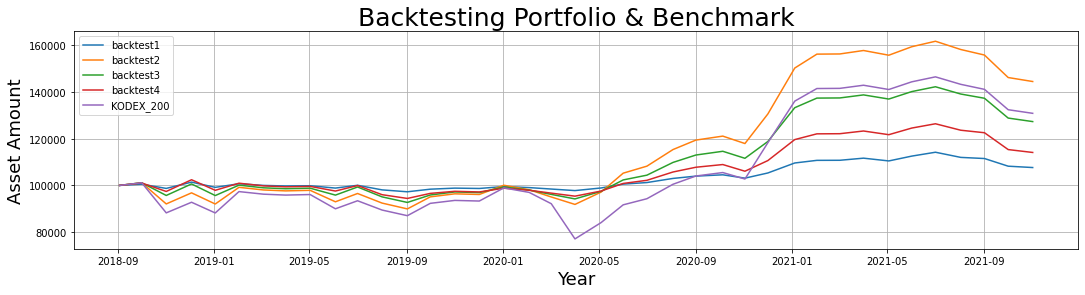

In [57]:
plt.figure(figsize = (18,4))

plt.plot(back_test.date, back_test.backtest1, label = 'backtest1')
plt.plot(back_test.date, back_test.backtest2, label = 'backtest2')
plt.plot(back_test.date, back_test.backtest3, label = 'backtest3')
plt.plot(back_test.date, back_test.backtest4, label = 'backtest4')
plt.plot(kodex_monthly.date, back_test.KODEX_200, label = 'KODEX_200')

plt.grid()
plt.legend(loc='best')
plt.title('Backtesting Portfolio & Benchmark', fontsize =25)
plt.xlabel('Year', fontsize = 18)
plt.ylabel('Asset Amount', fontsize = 18)

plt.show

##Compute CAGR

In [58]:
start, end = result[0], result2[-1]
cagr = ((end/start)**(1/len(set(kodex_monthly.date.dt.year)))-1) * 100

print('%2f'%cagr, '%')

9.642981 %


In [59]:
start, end = result3[0], result3[-1]
cagr = ((end/start)**(1/len(set(kodex_monthly.date.dt.year)))-1) * 100

print('%2f'%cagr, '%')

6.230165 %


In [60]:
start, end = result4[0], result4[-1]
cagr = ((end/start)**(1/len(set(kodex_monthly.date.dt.year)))-1) * 100

print('%2f'%cagr, '%')


3.356390 %


In [61]:
start, end = kodex_monthly.close.iloc[0], kodex_monthly.close.iloc[-1]
cagr = ((end/start)**(1/len(set(kodex_monthly.date.dt.year)))-1) * 100

print('%2f'%cagr, '%')


6.960884 %
